In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import gzip

In [2]:
#predicted_labels = np.load("./ndsb_dataset_nounk/predicted_labels_nounk.npy")
predicted_labels= np.load("./experimentos/transfer_laps_cnn_079_ndsb_nounk/predicted_labels_valid_ftteste3.npy")
#print(np.shape(predicted_labels))
#predicted_labels = np.argmax(predictions, axis=1)

#real_labels = np.load("./ndsb_dataset_nounk/real_labels_nounk.npy")
real = np.load("./experimentos/transfer_laps_cnn_079_ndsb_nounk/real_labels_valid_ftteste3.npy")
real_labels = np.argmax(real, axis=1)

#measures = np.load("focus_measure_ndsb_nounk.npy")
measures = np.load("focus_valid_laps.npy")

train_path = "./laps_nobg_100/images_train.npy.gz"
#labels_path = "./ndsb_dataset_nounk/labels_train.npy.gz"
#with gzip.open(labels_path, "rb") as f:
#    labels = np.load(f)

#train_idx = np.load("./laps_nobg_100/indices_train.npy")
valid_idx = np.load("./laps_nobg_100/indices_valid.npy")

with gzip.open(train_path, "rb") as f:
    imgs = np.load(f)
    
img_valid = imgs[valid_idx]

In [3]:
data = pd.DataFrame({'real':real_labels, 'predicted':predicted_labels, 'lapv':measures[:,0], 'lapm':measures[:,1], 'teng':measures[:,2], 'gblvar':measures[:,3], 'totvar':measures[:,4]})

data.head()

,gblvar,lapm,lapv,predicted,real,teng,totvar
0,0.078619,0.062546,0.038825,3,3,0.636660,7835.740039
1,0.024910,0.043574,0.003948,13,7,0.112697,8489.485862
2,0.005880,0.070231,0.015677,11,17,0.040518,8795.167319
3,0.035273,0.060877,0.014352,1,1,0.198906,8415.278765
4,0.010457,0.039253,0.005078,17,17,0.142213,8710.637350


In [4]:
measures_log = np.log(measures)

data_log = pd.DataFrame({'real':real_labels, 'predicted':predicted_labels, 'lapv':measures_log[:,0], 'lapm':measures_log[:,1], 'teng':measures_log[:,2], 'gblvar':measures_log[:,3], 'totvar':measures_log[:,4]})

C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


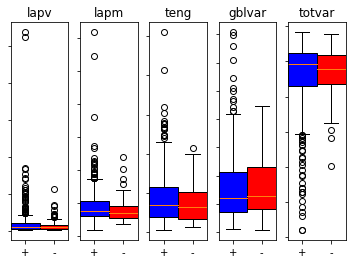

In [5]:
f, a = plt.subplots(1,5, sharex=False, sharey=False)
names = ['lapv', 'lapm', 'teng', 'gblvar', 'totvar']
colors = ['blue', 'red']

i=0
for name in names:
    box_true = data[data['predicted'] == data['real']][name]
    box_false = data[data['predicted'] != data['real']][name]
    bplot = a[i].boxplot([box_true, box_false], widths=1, labels=['+', '-'],patch_artist=True)
    a[i].set_title(name)
    a[i].get_yaxis().set_ticklabels('')
    i = i+1
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    
f.subplots_adjust(hspace=0)

plt.show()


C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


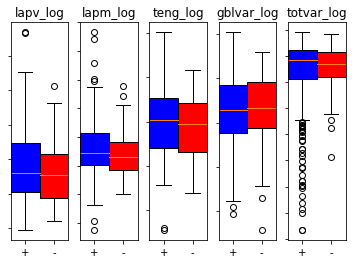

In [6]:
f, a = plt.subplots(1,5, sharex=False, sharey=False)
names = ['lapv', 'lapm', 'teng', 'gblvar', 'totvar']

i=0
for name in names:
    box_true = data_log[data_log['predicted'] == data_log['real']][name]
    box_false = data_log[data_log['predicted'] != data_log['real']][name]
    bplot = a[i].boxplot([box_true, box_false], widths=1, labels=['+', '-'],patch_artist=True)
    a[i].set_title(name + '_log')
    a[i].get_yaxis().set_ticklabels('')
    i = i+1
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    
f.subplots_adjust(hspace=0)

plt.show()

In [7]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title, fontsize=40)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [8]:
#titles = measures_log[40:60,2].round(decimals=4)
#images = img_valid[40:60]
#show_images(images[0:10], 1, titles[0:10].round(decimals=3))


In [9]:
classe = 12
medida= 'teng'

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


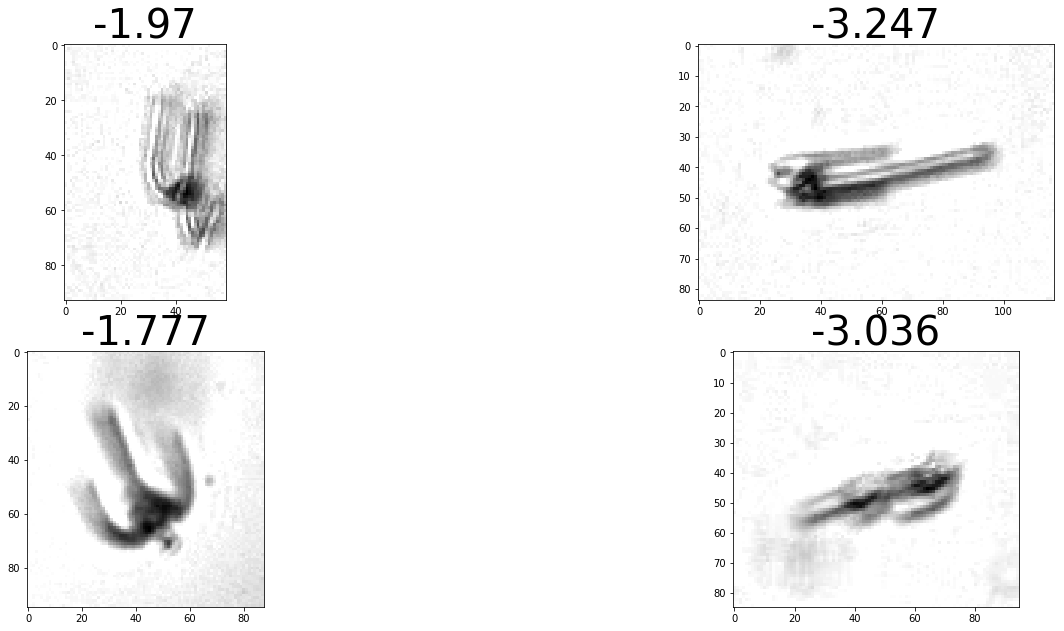

In [10]:
titles = data_log[data_log['predicted'] != classe][data_log['real'] == classe][medida]
index = data_log[data_log['predicted'] != classe][data_log['real'] == classe].index
images = img_valid[index]
show_images(images[0:15], 3, titles[0:15].round(decimals=3))

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


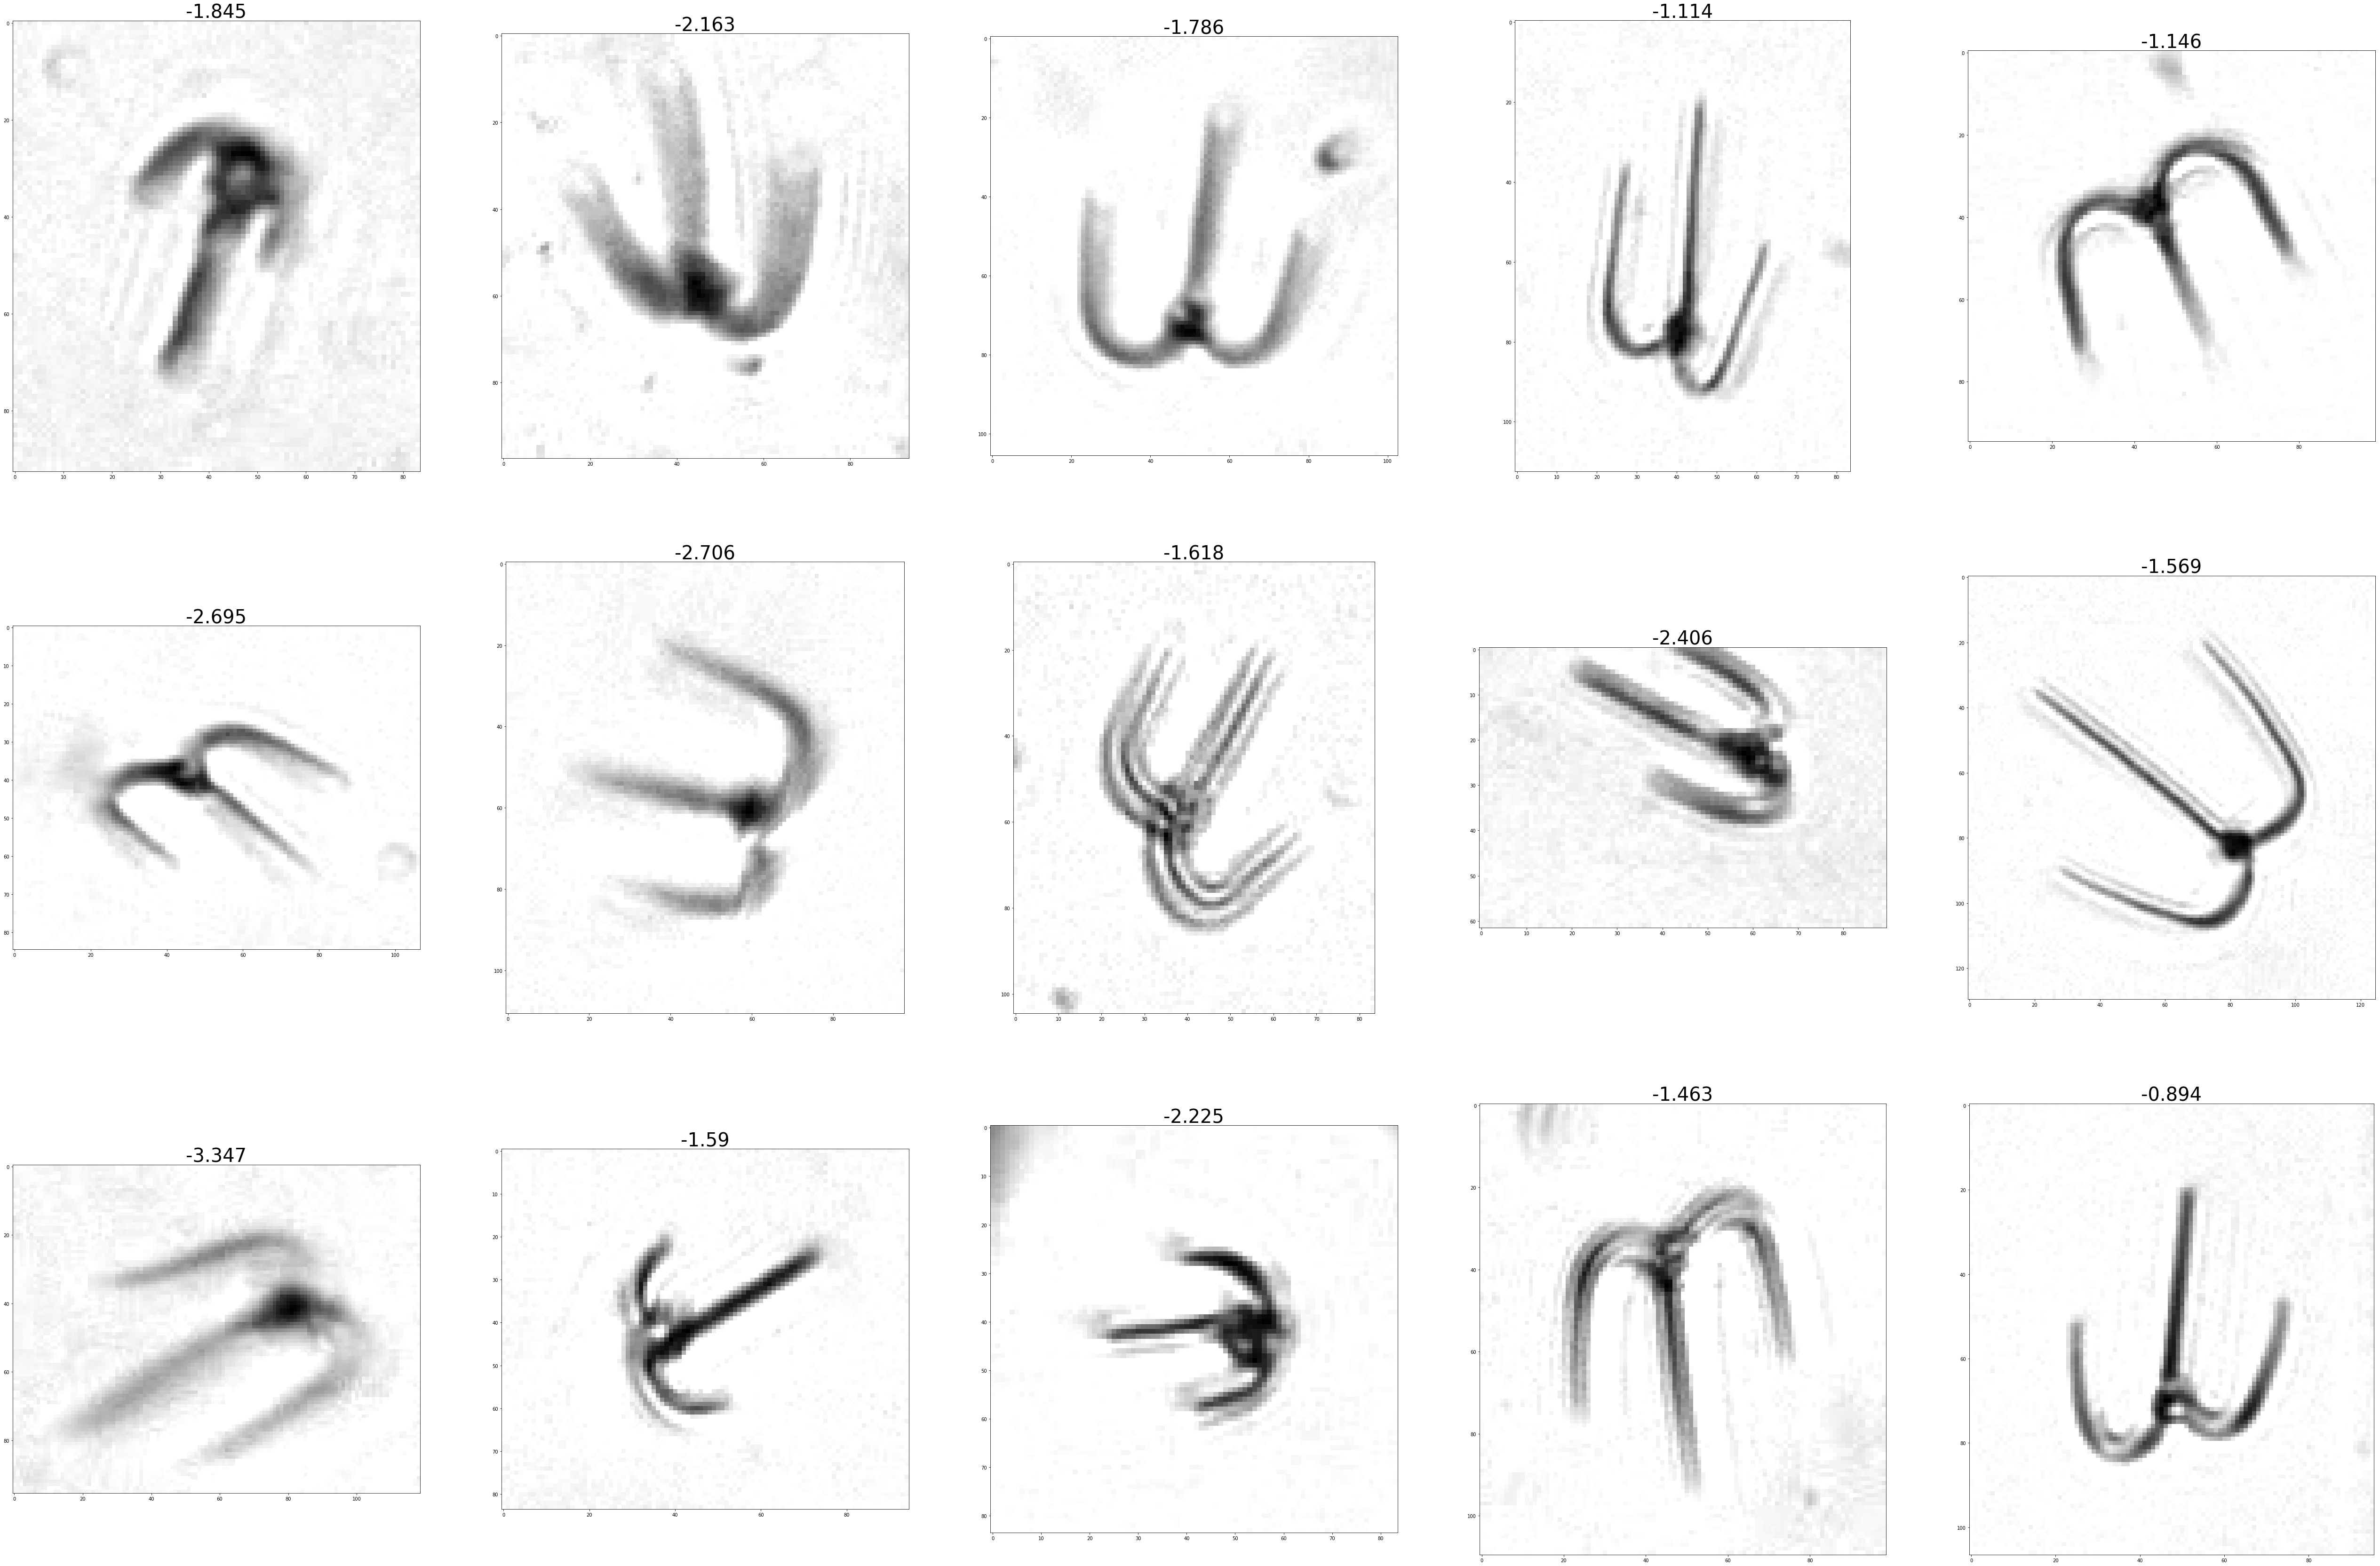

In [11]:
titles = data_log[data_log['predicted'] == classe][data_log['real'] == classe][medida]
index = data_log[data_log['predicted'] == classe][data_log['real'] == classe].index
images = img_valid[index]
show_images(images[0:15], 3, titles[0:15].round(decimals=3))

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


+ classe 0 :  (19,)
- classe 0 :  (2,)
+ classe 1 :  (8,)
- classe 1 :  (3,)
+ classe 2 :  (43,)
- classe 2 :  (1,)
+ classe 3 :  (23,)
- classe 3 :  (9,)
+ classe 4 :  (5,)
- classe 4 :  (6,)
+ classe 5 :  (9,)
- classe 5 :  (7,)
+ classe 6 :  (27,)
- classe 6 :  (2,)
+ classe 7 :  (25,)
- classe 7 :  (9,)
+ classe 8 :  (18,)
- classe 8 :  (9,)
+ classe 9 :  (11,)
- classe 9 :  (4,)
+ classe 10 :  (22,)
- classe 10 :  (7,)
+ classe 11 :  (19,)
- classe 11 :  (5,)
+ classe 12 :  (28,)
- classe 12 :  (4,)
+ classe 13 :  (44,)
- classe 13 :  (2,)
+ classe 14 :  (21,)
- classe 14 :  (5,)
+ classe 15 :  (10,)
- classe 15 :  (3,)
+ classe 16 :  (13,)
- classe 16 :  (3,)
+ classe 17 :  (52,)
- classe 17 :  (3,)
+ classe 18 :  (11,)
- classe 18 :  (1,)
+ classe 19 :  (25,)
- classe 19 :  (0,)
433
85
518


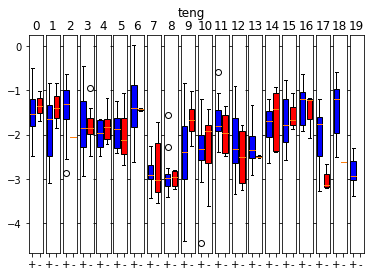

In [12]:
f, a = plt.subplots(1,20, sharex=False, sharey=True)

colors = ['blue', 'red']

soma_true = 0;
soma_false = 0;

for i in range(20):
    j = i
    box_true = data_log[data_log['predicted'] == i][data_log['real'] == i][medida]
    print("+ classe" , i , ": ", np.shape(box_true))
    soma_true = soma_true + np.shape(box_true)[0]
    box_false = data_log[data_log['predicted'] != i][data_log['real'] == i][medida]
    print("- classe" , i , ": ", np.shape(box_false))
    soma_false = soma_false + np.shape(box_false)[0]
    bplot = a[i].boxplot([box_true, box_false], widths=0.8, labels=['+', '-'],patch_artist=True)
    a[i].set_title(i)

    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
f.subplots_adjust(hspace=0)
f.suptitle(medida)
print(soma_true)
print(soma_false)
print(soma_true + soma_false)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


loading 0
loading 1
loading 2
loading 3
loading 4
loading 5
loading 6
loading 7
loading 8
loading 9
loading 10
loading 11
loading 12
loading 13
loading 14
loading 15
loading 16
loading 17
loading 18
loading 19


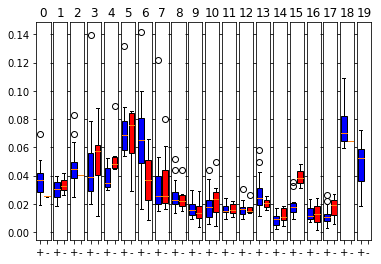

In [13]:
f, a = plt.subplots(1,20, sharex=False, sharey=True)

colors = ['blue', 'red']

for i in range(20):
    j = i
    box_true = data[data['predicted'] == j][data['real'] == j]['gblvar']
    box_false = data[data['predicted'] != j][data['real'] == j]['gblvar']
    print("loading", j)
    bplot = a[i].boxplot([box_true, box_false], widths=0.8, labels=['+', '-'],patch_artist=True)
    a[i].set_title(j)

    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
f.subplots_adjust(hspace=0)
plt.show()

In [14]:
true_false = np.zeros(len(real_labels), dtype=int)
for i in range(len(real_labels)):
    if predicted_labels[i] == real_labels[i]:
        true_false[i] = 1

Text(0,0.5,'Modified Laplacian')

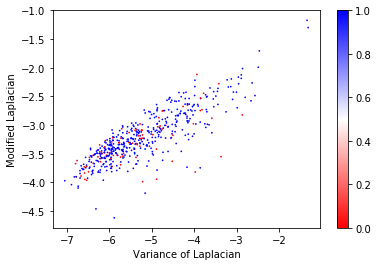

In [15]:
fig, ax = plt.subplots()
plt.scatter(measures_log[:,0], measures_log[:,1], c=true_false, s=0.5, cmap='bwr_r')
plt.colorbar()
ax.set_xlabel('Variance of Laplacian')
ax.set_ylabel('Modified Laplacian')

gblvar          0.024910
lapm            0.043574
lapv            0.003948
predicted      13.000000
real            7.000000
teng            0.112697
totvar       8489.485862
Name: 1, dtype: float64


<function matplotlib.pyplot.show>

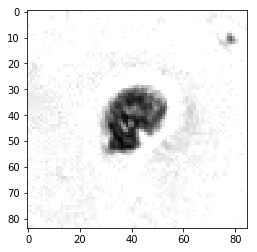

In [16]:
print(data.iloc[1])
plt.imshow(img_valid[1], cmap='gray')
plt.show

In [45]:
######K-Means clustering to find the thresold for focus

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
import time

batch_size = 45

X = pd.DataFrame({'medida1': data_log[medida], 'medida2':data_log['lapm']})
labels_true = data_log['real']
n_clusters = 4
print(X)

      medida1   medida2
0   -0.451520 -2.771859
1   -2.183049 -3.133297
2   -3.206005 -2.655963
3   -1.614923 -2.798895
4   -1.950428 -3.237726
5   -2.621744 -3.606583
6   -1.874586 -2.728499
7   -1.408305 -2.937997
8   -1.850493 -3.445508
9   -1.917210 -3.007916
10  -1.374326 -2.899796
11  -1.457784 -3.361597
12  -2.144846 -3.608006
13  -2.464656 -3.436388
14  -3.004380 -3.208312
15  -1.069838 -3.757706
16  -1.163311 -3.170092
17  -2.989000 -3.205422
18  -0.570720 -3.119113
19  -1.410158 -3.113480
20  -2.947300 -3.237062
21  -2.208414 -3.092804
22  -1.845268 -3.339589
23  -1.805215 -3.328412
24  -2.010907 -3.583667
25  -2.528331 -3.669328
26  -1.926453 -3.462046
27  -2.834746 -3.929818
28  -1.632573 -2.214256
29  -2.398651 -3.483271
..        ...       ...
488 -3.069620 -3.225783
489 -1.232840 -3.218388
490 -1.509073 -3.257136
491 -0.868650 -4.620536
492 -1.824062 -2.825875
493 -2.415794 -2.982177
494 -1.843171 -3.240034
495 -2.463745 -3.262298
496 -2.659890 -2.525094
497 -1.461270 -3

In [46]:
#from sklearn.datasets.samples_generator import make_blobs
#centers = [[1, 1], [-1, -1], [1, -1]]
#n_clusters = len(centers)
#X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

In [47]:
# #############################################################################
# Compute clustering with Means


k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0



In [48]:
# #############################################################################
# Compute clustering with MiniBatchKMeans

mbk = MiniBatchKMeans(init='k-means++', n_clusters=n_clusters, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

In [49]:
k_means.cluster_centers_

array([[-1.09779841, -2.61855459],
       [-2.37860106, -3.31800011],
       [-3.05210288, -3.38751812],
       [-1.62102589, -3.39136405]])

In [50]:
mbk.cluster_centers_

array([[-1.58473492, -3.36986524],
       [-3.02090806, -3.37595696],
       [-2.2947263 , -3.34144169],
       [-1.06373959, -2.63241888]])

TypeError: unhashable type: 'numpy.ndarray'

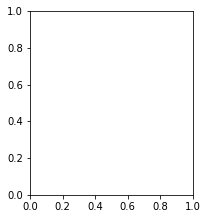

In [51]:
# #############################################################################
# Plot result

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06', 'red']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)
order = pairwise_distances_argmin(k_means_cluster_centers,
                                  mbk_means_cluster_centers)


# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == order[k]
    cluster_center = mbk_means_cluster_centers[order[k]]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('MiniBatchKMeans')
ax.set_xticks(())
ax.set_yticks(())

# Initialise the different array to all False
different = (mbk_means_labels == 4)
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += ((k_means_labels == k) != (mbk_means_labels == order[k]))

identic = np.logical_not(different)
ax.plot(X[identic, 0], X[identic, 1], 'w',
        markerfacecolor='#bbbbbb', marker='.')
ax.plot(X[different, 0], X[different, 1], 'w',
        markerfacecolor='m', marker='.')
ax.set_title('Difference')
ax.set_xticks(())
ax.set_yticks(())

plt.show()

In [53]:
######PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)  
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.components_)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  

[[ 0.94779718  0.31887379]
 [ 0.31887379 -0.94779718]]
[0.79024318 0.20975682]
[17.1919171   8.85731267]
